Cell di bawah adalah untuk mengimport library yang akan digunakan dalam program ini. Library yang digunakan adalah cv2, numpy, matplotlib, dan matplotlib.image. opencv berguna untuk menggunakan fungsi seperti cv2.imread() dan cv2.imshow() numpy berguna untuk menggunakan fungsi seperti np.array() matplotlib berguna untuk menggunakan fungsi seperti plt.imshow()

In [26]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Fungsi dibawah merupakan fungsi untuk menampilkan gambar dari file yang kita pilih

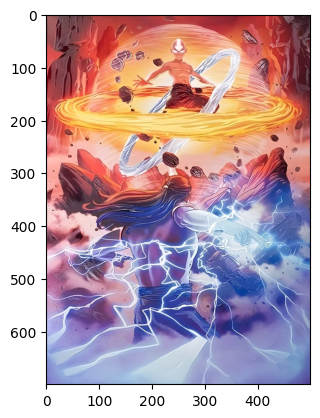

In [27]:
image = plt.imread("aang.jpg")
plt.imshow(image)

# 1.Membuat Grayscale

 script di bawah berfungsi untuk  mengisi variabel "gray_img" yang menyimpan hasil dari convert color atau konversi warna dari gambar yang akan ditampilkan menjadi gray menggunakan library cv. sript "plt.imshow(gray_img, cmap="gray")" berfungsi untuk menampilkan gambar menggunakan library matplotlib.image dengan parameter gambar dari "gray_img" dan mengubah color map gambar tersebut menjadi gray/abu.

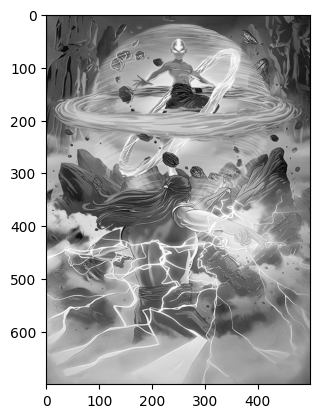

In [28]:
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow (gray_img, cmap = 'gray')

# 2.Membuat histogram grayscale

script di bawah berfungsi untuk menampilkan jumlah array dari parameter "gray_img" sebelumnya

In [29]:
gray_img

array([[156, 110, 123, ...,  17,  25,  14],
       [151, 102, 114, ...,  26,  35,  21],
       [149,  97, 110, ...,  31,  42,  24],
       ...,
       [161, 144, 143, ...,  95,  95,  96],
       [161, 144, 144, ...,  95,  95,  95],
       [162, 146, 146, ...,  94,  94,  94]], dtype=uint8)

Script di bawah berfungsi untuk menampilkan nilai shape dari tinggi dan lebar variabel gray_img.

In [30]:
gray_img.shape

(700, 500)

Script di bawah berfungsi untuk menyimpan nilai tinggi dan lebar ke dalam variabel, kali ini digunakan variabel row dan col

In [31]:
row = 920
col = 827

code dibawah membuat array dengan isi dari 0 sampai 255 untuk sebagai index agar bisa di tampilkan dalam bentuk diagram membuat variabel untuk menyimpan tingga dan lebar pixel dengan fungsi shape yang dimana shape[0] adalah tinggi dan shape[1] dan lebar membuat array baru yang kosong sebanyak 8 bit dengan tipe data intarray ini nantinya akan digunakan untuk menyimpan nilai gray untuk setiap index.Kemudian menghitung jumlah setiap nilai gray dari index ke 0 sampai 255 pada setiap pixel sebanyak tinggi*lebar

In [32]:

gratindex = [i for i in range(256)]

tinggi,lebar = gray_img.shape
jumlah = np.zeros(256).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        nilaigray = gray_img[i, j]
        jumlah[nilaigray]+=1


<BarContainer object of 256 artists>

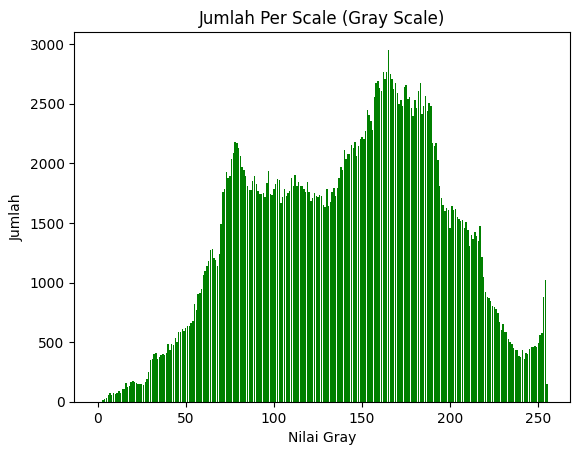

In [33]:

plt.title('Jumlah Per Scale (Gray Scale)')
plt.xlabel('Nilai Gray')
plt.ylabel('Jumlah')
plt.bar(gratindex,jumlah, color= 'green')

# 3. Konvolusi pada Citra
dengan zero padding dan dengan kernel berikut

            ([[1, 2, -1, 1],
              [0, 2, 1, 2 ], 
              [2, 1, 1, 0 ], 
              [1, 0, -1, 0]])

fungsi di bawah ini berfungsi untuk menetapkan variabel kernel sebagai variabel bertipe array

In [34]:
kernel = np.array([[1, 2, -1, 1], 
                   [0, 2, 1, 2 ], 
                   [2, 1, 1, 0 ], 
                   [1, 0, -1, 0]])

print(kernel)

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


fungsi di bawah ini untuk mencari ukuran gambaran dan ukuran kernel

In [35]:
img_tinggi, img_lebar = gray_img.shape
kernel_tinggi, kernel_lebar = kernel.shape

fungsi di bawah berfungsi untuk menentukan ukuran padding yang ditambahkan kedalam gambar dan agar nilainya tidak berubah.

In [36]:
padding_size = int((kernel_tinggi - 1) / 2)
pad_width=((padding_size, padding_size+1), (padding_size, padding_size+1))
padding_grayimage = np.pad(gray_img, pad_width, mode='constant')
zeroPadding = np.zeros((img_tinggi, img_lebar))

fungsi di bawah berfungsi untuk membaca tiap indeksi pada array zero padding dan untuk mencari hasil nilai dari ukuran kernel tersebut.

In [37]:
for i in range(zeroPadding.shape[0]):
    for j in range(zeroPadding.shape[1]):   
        subset = padding_grayimage[i:i + kernel_tinggi, j:j + kernel_lebar]
        weighted_subset = subset * kernel
        sum_of_weighted_subset = np.sum(weighted_subset)
        zeroPadding[i][j] = np.round(sum_of_weighted_subset)
print (zeroPadding)

[[ 824. 1142. 1024. ...  194.  179.  161.]
 [1108. 1460. 1312. ...  289.  280.  247.]
 [1083. 1418. 1260. ...  326.  325.  286.]
 ...
 [1233. 1809. 1737. ... 1140.  857.  859.]
 [1383. 1803. 1758. ... 1137.  850.  759.]
 [1084. 1199. 1183. ...  754.  472.  473.]]


dibawah ini berfungsi untuk mencari nilai minimum dan maksimum dari seluruh piksel setelah di konvolusi dan mencari nilai array hasil dari clipping

In [38]:
min = np.min(zeroPadding)
max = np.max(zeroPadding)
clipping = np.round((zeroPadding - min) / (max - min))
print(clipping)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


fungsi dari code dibawah ini untuk menampilkan hasil gambar yang sudah di olah sebelumnya pada variable clip dngan color map yang gray.



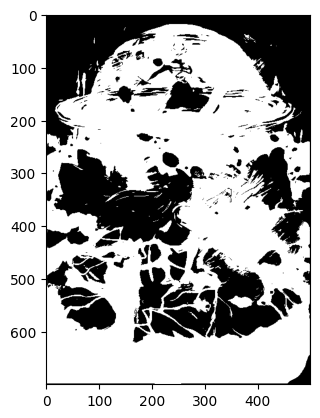

In [39]:
plt.imshow(clipping,cmap='gray')

# 4.Melakukan Rotasi

fungsi dibawah memutar citra sesuai dengan sudut yang diinginkan yaitu 40 derajat. Proses ini dilakukan pada setiap piksel citra dengan menggunakan nilai baris dan kolom piksel pada citra yang sebelumnya

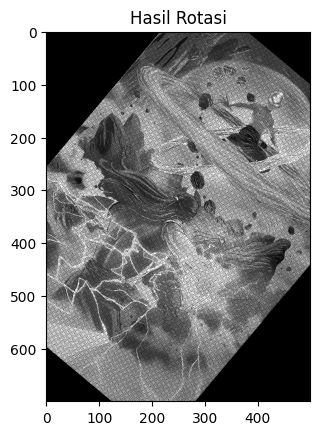

In [40]:
# Tentukan sudut rotasi (dalam radian)
angle = 40 * np.pi / 180

# Dapatkan tinggi dan lebar citra
height, width = gray_img.shape

# Hitung titik pusat rotasi
center = (width // 2, height // 2)

# Inisialisasi citra hasil rotasi
rotated_image = np.zeros((height, width))

for x in range(width):
    for y in range(height):
        # Hitung koordinat piksel setelah rotasi
        new_x = int((x - center[0]) * np.cos(angle) - (y - center[1]) * np.sin(angle) + center[0])
        new_y = int((x - center[0]) * np.sin(angle) + (y - center[1]) * np.cos(angle) + center[1])
        
        # Pastikan piksel yang diputar berada dalam batas citra
        if 0 <= new_x < width and 0 <= new_y < height:
            rotated_image[new_y, new_x] = gray_img[y, x]

# Tampilkan citra yang diputar
plt.imshow(rotated_image, cmap='gray')
plt.title('Hasil Rotasi')
plt.show()


# 5.Melakukan Translasi

fungsi dibawah memindahkan setiap piksel citra sesuai dengan jarak yang diinginkan. Proses ini dilakukan pada setiap piksel dengan menggunakan atau posisi yang telah di rotasi pada rotated_image untuk menentukan posisi baru piksel pada citra hasil translasi.

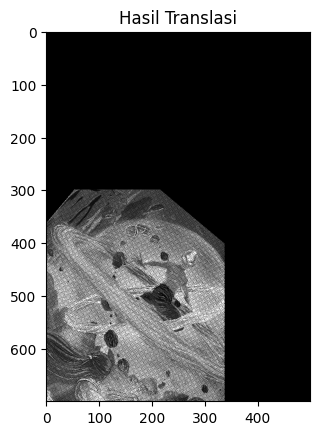

In [41]:
# Tentukan pergeseran pada sumbu x dan y
tx = -163
ty = 300

# Dapatkan tinggi dan lebar citra
height, width = gray_img.shape

# Inisialisasi citra hasil translasi
translated_image = np.zeros((height, width))

# Lakukan translasi
for x in range(width):
    for y in range(height):
        # Hitung koordinat piksel setelah translasi
        new_x = x + tx
        new_y = y + ty
        
        # Pastikan piksel yang ditranslasi berada dalam batas citra
        if 0 <= new_x < width and 0 <= new_y < height:
            translated_image[new_y, new_x] = rotated_image[y, x]

# Tampilkan citra yang telah ditranslasi
plt.imshow(translated_image, cmap="gray")
plt.title('Hasil Translasi')
plt.show()


# 6.Melakukan Pencerminan

fungsi dibawah melakukan pencerminan citra grayscale terhadap sumbu Y (Vertikal) dengan cara membalik citra secara horizontal. Pada setiap piksel citra, nilai pada baris akan diubah menjadi nilai pada baris yang berlawanan, sehingga citra akan terbalik pada sumbu vertikal.

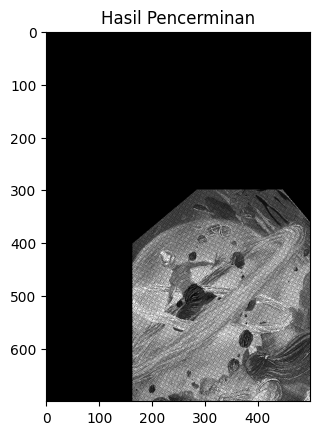

In [42]:
# Dapatkan tinggi dan lebar citra
height, width = translated_image.shape

# Inisialisasi citra hasil pencerminan
mirrored_image = np.zeros((height, width))

# Lakukan pencerminan terhadap sumbu y
for x in range(width):
    for y in range(height):
        # Hitung koordinat piksel setelah pencerminan
        new_x = width - 1 - x  # Pencerminan terhadap sumbu y
        new_y = y
        
        # Masukkan nilai piksel dari citra asli ke citra hasil pencerminan
        mirrored_image[new_y, new_x] = translated_image[y, x]

# Tampilkan citra yang telah dipermirrored_image
plt.imshow(mirrored_image, cmap="gray")
plt.title('Hasil Pencerminan')
plt.show()


# 7.Melakukan Ditalisasi

fungsi dibawah melakukan dilatasi citra dengan metode replikasi. Pertama, citra awal diambil ukuran tinggi dan lebarnya. Kemudian, ukuran citra hasil diperbesar tiga kali lipat. Dilatasi dilakukan dengan mengulang setiap piksel dalam citra awal dan mereplikasi setiap piksel ke dalam blok 3x3 pada citra hasil. Hasil dilatasi ditampilkan menggunakan plot.

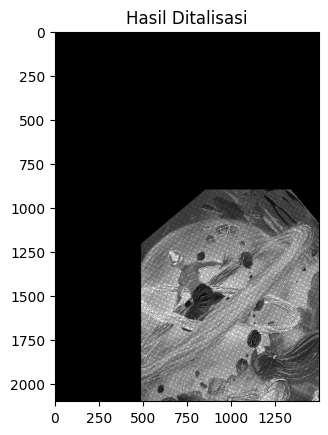

In [43]:
# Dapatkan tinggi dan lebar citra
height, width = mirrored_image.shape

# Hitung ukuran citra hasil dilatasi
new_height = height * 3
new_width = width * 3

# Inisialisasi citra hasil dilatasi
dilated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# Lakukan dilatasi
for x in range(width):
    for y in range(height):
        # Hitung koordinat piksel dalam citra hasil
        new_x = x * 3
        new_y = y * 3
        
        # Replikasi piksel ke dalam blok 3x3
        dilated_image[new_y:new_y+3, new_x:new_x+3] = mirrored_image[y, x]

# Tampilkan citra yang telah dilatasi
plt.imshow(dilated_image, cmap="gray")
plt.title('Hasil Ditalisasi')
plt.show()
